In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('breastcancer_train.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              509 non-null    int64  
 1   diagnosis       509 non-null    object 
 2   radius_m        509 non-null    float64
 3   texture_m       509 non-null    float64
 4   perimeter_m     509 non-null    float64
 5   area_m          509 non-null    float64
 6   smoothness_m    509 non-null    float64
 7   compactness_m   509 non-null    float64
 8   concavity_m     509 non-null    float64
 9   concavepts_m    509 non-null    float64
 10  symmetry_m      509 non-null    float64
 11  fractaldim_m    509 non-null    float64
 12  radius_se       509 non-null    float64
 13  texture_se      509 non-null    float64
 14  perimeter_se    509 non-null    float64
 15  area_se         509 non-null    float64
 16  smoothness_se   509 non-null    float64
 17  compactness_se  509 non-null    flo

In [8]:
data.describe()

,id,radius_m,texture_m,perimeter_m,area_m,smoothness_m,compactness_m,concavity_m,concavepts_m,symmetry_m,...,radius_w,texture_w,perimeter_w,area_w,smoothness_w,compactness_w,concavity_w,concavepts_w,symmetry_w,fractaldim_w
count,5.090000e+02,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,3.242796e+07,14.081481,19.371218,91.689823,650.564833,0.096454,0.105161,0.089034,0.048862,0.181682,...,16.206560,25.714715,106.895403,874.445776,0.132412,0.255503,0.272176,0.114368,0.290220,0.084254
std,1.317092e+08,3.531773,4.429189,24.376820,347.811936,0.014078,0.053450,0.080323,0.039058,0.028120,...,4.868071,6.274501,33.899624,569.430461,0.022981,0.155693,0.208138,0.065803,0.061672,0.017591
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.023440,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.600000,16.170000,74.330000,409.700000,0.086410,0.066020,0.029870,0.020310,0.162000,...,12.840000,21.080000,83.510000,507.200000,0.116600,0.147200,0.116400,0.064930,0.250400,0.071910
50%,9.056860e+05,13.300000,18.910000,86.180000,546.300000,0.095940,0.092630,0.061260,0.032750,0.179200,...,14.910000,25.410000,97.190000,683.400000,0.131200,0.216700,0.224900,0.098040,0.282700,0.080090
75%,8.813129e+06,15.780000,21.880000,104.700000,788.500000,0.105400,0.130500,0.130700,0.073640,0.196400,...,18.810000,30.150000,125.900000,1088.000000,0.146500,0.341600,0.385300,0.160700,0.317900,0.092210
max,9.113205e+08,27.420000,39.280000,186.900000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,0.937900,1.252000,0.291000,0.663800,0.173000


In [38]:
from sklearn.preprocessing import LabelEncoder

def loadpreprocess(file='breastcancer_train.csv'):
    data = pd.read_csv(file)

    # separate features and target
    Xin = data
    yin = data.pop('diagnosis')
    
    # encode target
    le = LabelEncoder()
    yin = le.fit_transform(yin)
    #print(le.classes_)
    return Xin, yin

### Baseline Model

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

Xin, yin = loadpreprocess(file='breastcancer_train.csv')

score=[]
# split into folds, preserving diagnosis proportions in splits
skf = StratifiedKFold(n_splits=10)
for trainidx, validx in skf.split(Xin, yin):
    X = Xin.loc[trainidx,:].copy()
    y = yin[trainidx].copy()
    
    xval = Xin.loc[validx,:].copy()
    yval = yin[validx].copy()
    
    # fit classifier and score
    rfc = RandomForestClassifier(random_state=123)
    rfc.fit(X,y)
    score.append(rfc.score(xval, yval))
    
print(f'Accuracy of each fold:\n {score}')
print(f'Baseline mean accuracy:\n {np.mean(score)}')
print(f'Baseline accuracy variance:\n {np.var(score)}')


Accuracy of each fold:
 [0.9803921568627451, 0.8627450980392157, 0.9215686274509803, 0.9607843137254902, 0.9803921568627451, 0.9607843137254902, 0.9607843137254902, 0.9803921568627451, 0.9411764705882353, 1.0]
Baseline mean accuracy:
 0.9549019607843137
Baseline accuracy variance:
 0.00138792772010765


In [11]:
# feature importance

feat = rfc.feature_names_in_
impor = rfc.feature_importances_
featimpor = pd.Series(rfc.feature_importances_, index=rfc.feature_names_in_).sort_values(ascending=False)

for num in range(len(featimpor)):
    print(f'{featimpor.index[num]}: {featimpor[num]}')

perimeter_w: 0.145831012148896
radius_w: 0.14016035176979266
concavepts_w: 0.10473167216933098
concavepts_m: 0.10388063052706795
area_w: 0.08075849881765362
perimeter_m: 0.05893855553009969
concavity_w: 0.044334582814905606
radius_m: 0.04118812896065432
area_m: 0.040237804041240874
area_se: 0.03668641163160762
concavity_m: 0.031566641097172186
radius_se: 0.017169205782818362
texture_w: 0.017038622767037576
texture_m: 0.01661031786335454
compactness_w: 0.015628069730014266
compactness_m: 0.01389550639141883
smoothness_w: 0.011696356039187757
symmetry_w: 0.011511074310718471
perimeter_se: 0.00885172846298659
fractaldim_w: 0.007490266929382887
smoothness_m: 0.007003978467488062
id: 0.006805973215668072
concavity_se: 0.006463493859837418
symmetry_se: 0.005834062088570754
fractaldim_se: 0.004383692985012545
compactness_se: 0.004085481412301531
symmetry_m: 0.003847689933669552
fractaldim_m: 0.0037637514818282397
concavepts_se: 0.003385516669807094
texture_se: 0.003259055689094634
smoothness_

In [12]:
# drop uninportant features

def dropfeat(df):
    unimportant = featimpor[featimpor<=featimpor['id']].index
    df = df.drop(unimportant, axis=1)
    return df

featimpor[featimpor<=featimpor['id']].index

Index(['id', 'concavity_se', 'symmetry_se', 'fractaldim_se', 'compactness_se',
       'symmetry_m', 'fractaldim_m', 'concavepts_se', 'texture_se',
       'smoothness_se'],
      dtype='object')

In [13]:
# create new features

def addfeat(df):
    new = pd.DataFrame()
    new['perim_wxconpts_m'] = df['perimeter_w']*df['concavepts_m']
    new['perim_w-m'] = df['perimeter_w']-df['perimeter_m']
    #new['radius_wxconpts_w'] = df['radius_w']*df['concavepts_w']
    #new['radius_w-m'] = df['radius_w']-df['radius_m']
    #new['concavepts_w-m'] = df['concavepts_w']-df['concavepts_m']
    #new['area_w-m'] = df['area_w']-df['area_m']
    #new['perimxradius_w'] = df['radius_w']*df['perimeter_w']
    #new['textxradius_w'] = df['radius_w']*df['texture_w']

    return new


In [14]:
# test new features

Xin, yin = loadpreprocess(file='breastcancer_train.csv')

# remove features
Xin=dropfeat(Xin)
#print(Xin.shape)
# add new features
Xin = Xin.join(addfeat(Xin))  
#print(Xin.shape)

score=[]
# split into folds, preserving diagnosis proportions in splits
skf = StratifiedKFold(n_splits=10)
for trainidx, validx in skf.split(Xin, yin):
    
    X = Xin.loc[trainidx,:].copy()
    y = yin[trainidx].copy()
    
    xval = Xin.loc[validx,:].copy()
    yval = yin[validx].copy()

    # fit classifier and score
    rfc = RandomForestClassifier(random_state=123)
    rfc.fit(X,y)
    score.append(rfc.score(xval, yval))
    
print(f'Accuracy of each fold:\n {score}')
print(f'Mean accuracy:\n {np.mean(score)}')
print(f'Accuracy variance:\n {np.var(score)}')


Accuracy of each fold:
 [0.9803921568627451, 0.9019607843137255, 0.9411764705882353, 0.9803921568627451, 1.0, 0.9803921568627451, 0.9803921568627451, 0.9803921568627451, 0.9803921568627451, 1.0]
Mean accuracy:
 0.972549019607843
Accuracy variance:
 0.0007843137254901955


In [15]:
# optimize model

from sklearn.model_selection import GridSearchCV

Xin, yin = loadpreprocess(file='breastcancer_train.csv')
# remove features
Xin=dropfeat(Xin)
# add new features
Xin = Xin.join(addfeat(Xin)) 

rfc = RandomForestClassifier(random_state=123) 
paramgrid = dict(n_estimators=[75,100,150],
                 max_depth=[4,6,8,10],
                 criterion=['gini','entropy'],
                 max_features=['sqrt','log2'])

skf = StratifiedKFold(n_splits=10)

opt = GridSearchCV(estimator=rfc, param_grid=paramgrid, cv=skf)
opt.fit(Xin, yin)

opt.best_params_


{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 100}

### Final Model

In [16]:
Xin, yin = loadpreprocess(file='breastcancer_train.csv')

# remove features
Xin=dropfeat(Xin)
# add new features
Xin = Xin.join(addfeat(Xin))  

score=[]
# split into folds, preserving diagnosis proportions in splits
skf = StratifiedKFold(n_splits=10)
for trainidx, validx in skf.split(Xin, yin):
    
    X = Xin.loc[trainidx,:].copy()
    y = yin[trainidx].copy()
    
    xval = Xin.loc[validx,:].copy()
    yval = yin[validx].copy()
    
    # fit classifier and score
    rfc = RandomForestClassifier(random_state=123,
                                criterion='gini',
                                max_depth=8,
                                max_features='sqrt',
                                n_estimators=100)
    rfc.fit(X,y)
    score.append(rfc.score(xval, yval))
    
print(f'Accuracy of each fold:\n {score}')
print(f'Final model mean accuracy:\n {np.mean(score)}')
print(f'Final model accuracy variance:\n {np.var(score)}')


Accuracy of each fold:
 [0.9803921568627451, 0.9019607843137255, 0.9411764705882353, 0.9803921568627451, 1.0, 0.9803921568627451, 0.9803921568627451, 0.9803921568627451, 0.9803921568627451, 1.0]
Final model mean accuracy:
 0.972549019607843
Final model accuracy variance:
 0.0007843137254901955


### Test set performance

In [25]:
# fit on training set
Xin, yin = loadpreprocess(file='breastcancer_train.csv')

# remove features
Xin=dropfeat(Xin)
# add new features
Xin = Xin.join(addfeat(Xin))

# fit classifier
rfc = RandomForestClassifier(random_state=123,
                            criterion='gini',
                            max_depth=8,
                            max_features='sqrt',
                            n_estimators=100)
rfc.fit(Xin,yin)

# transform and predict on test set
Xtest, ytest = loadpreprocess(file='breastcancer_test.csv')

# remove features
Xtest=dropfeat(Xtest)
# add new features
Xtest = Xtest.join(addfeat(Xtest))

# score on test set
score = rfc.score(Xtest, ytest)
    
print(f'Final model accuracy on test set:\n {score}')

Final model accuracy on test set:
 0.9833333333333333


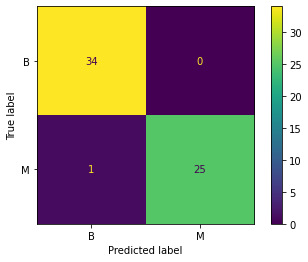

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rfc, Xtest,ytest, display_labels=['B','M'])

In [40]:
# B = 0, M = 1
# not good to predict benign when actually malignant
results = pd.DataFrame(rfc.predict_proba(Xtest), columns=['probB','probM'])
results['pred_label']=rfc.predict(Xtest)
results['true_label']=ytest
results

,probB,probM,pred_label,true_label
0,1.00000,0.00000,0,0
1,1.00000,0.00000,0,0
2,0.00000,1.00000,1,1
3,0.99000,0.01000,0,0
4,0.00000,1.00000,1,1
5,0.80000,0.20000,0,0
6,1.00000,0.00000,0,0
7,0.98000,0.02000,0,1
8,0.61800,0.38200,0,0
9,0.79000,0.21000,0,0
